In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
df = pd.read_csv("allocations.csv")
df["Day"] = df["Day"].map(lambda x: int(x[4:]))
df.head()

,Day,Position,Candidate Id,Experience,Language Skills,Presentation Skills
0,1,Client Services Assistant,130,5,4,0
1,1,Client Services Assistant,158,5,1,5
2,1,Client Services Assistant,209,5,4,5
3,1,Client Services Assistant,210,5,2,1
4,1,Client Services Assistant,236,5,3,0


In [3]:
df.describe()

,Day,Candidate Id,Experience,Language Skills,Presentation Skills
count,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000
mean,4.904119,165.626604,4.679946,2.453747,2.581364
std,2.399942,96.384129,0.506908,1.481663,1.456218
min,1.000000,1.000000,3.000000,0.000000,0.000000
25%,3.000000,82.000000,4.000000,1.000000,1.000000
50%,5.000000,165.000000,5.000000,2.000000,3.000000
75%,7.000000,251.000000,5.000000,4.000000,4.000000
max,9.000000,330.000000,5.000000,5.000000,5.000000


In [4]:
print("Maximum total working days: ", df.groupby("Candidate Id").count().max()["Day"])

Maximum total working days:  7


In [5]:
days_array = []
for candidate in df["Candidate Id"].sort_values().unique():
    days = list(df[df["Candidate Id"] == candidate]["Day"])
    days_array.append([1 if i in days else 0 for i in range(1, 10)])

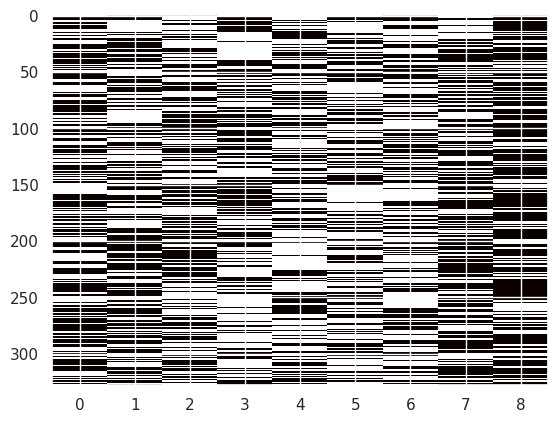

In [6]:
plt.imshow(days_array, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

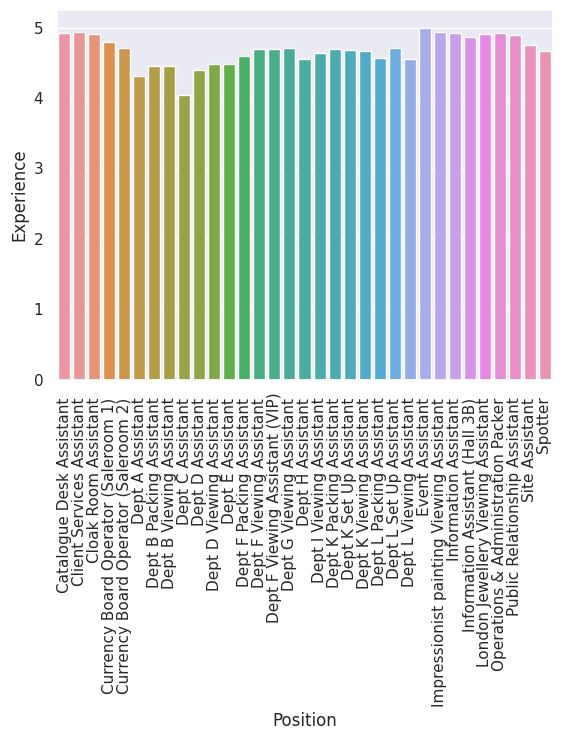

In [7]:
def show_group_by_position():
    df_grouped_by_position = df.groupby("Position").mean()
    sns.barplot(data=df_grouped_by_position, x=df_grouped_by_position.index, y="Experience")
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.show()
    
show_group_by_position()

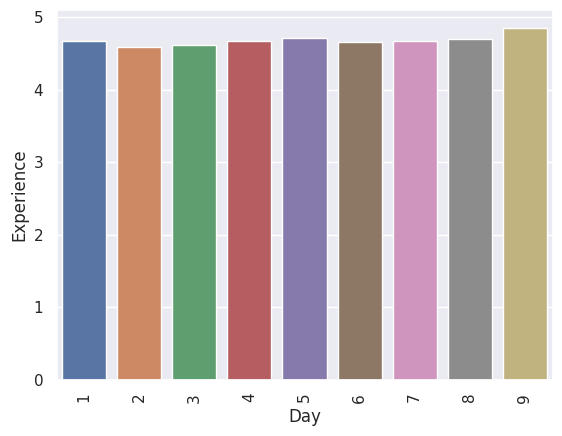

In [8]:
def show_group_by_day():
    df_grouped_by_day = df.groupby("Day").mean(numeric_only=True)
    sns.barplot(data=df_grouped_by_day, x=df_grouped_by_day.index, y="Experience")
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.show()
show_group_by_day()